# Data Wrangling과 학습모델 훈련

## 교차검증 모델

In [8]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 숫자 데이터셋을 로드합니다.
digits = datasets.load_digits()

# 특성 행렬을 만듭니다.
features = digits.data

# 타깃 벡터를 만듭니다.
target = digits.target

In [9]:
# 표준화 객체를 만듭니다.
standardizer = StandardScaler()

# 로지스틱 회귀 객체를 만듭니다.
logit = LogisticRegression()

# 표준화한 다음 로지스틱 회귀를 실행하는 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

# k-폴드 교차검증을 만듭니다.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# k-폴드 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9693916821849783

In [10]:
# 10개 폴드의 점수를 모두 확인하기
cv_results

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [11]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)

# 훈련 세트로 standardizer의 fit 메서드를 호출합니다.
standardizer.fit(features_train)

# 훈련 세트와 테스트 세트에 모두 적용합니다.
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [12]:
# 파이프라인을 만듭니다.
pipeline = make_pipeline(standardizer, logit)

In [13]:
# k-폴드 교차 검증 수행
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=kf, # 교차검증
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

In [14]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기를 만듭니다.
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=ss, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 평균을 계산합니다.
cv_results.mean()

0.9630555555555554

In [15]:
from sklearn.model_selection import RepeatedKFold

# RepeatedKFold 분할기를 만듭니다.
rfk = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# 교차검증을 수행합니다.
cv_results = cross_val_score(pipeline, # 파이프라인
                             features, # 특성 행렬
                             target, # 타깃 벡터
                             cv=rfk, # 교차 검증 기법
                             scoring="accuracy", # 평가 지표
                             n_jobs=-1) # 모든 CPU 코어 사용

# 검증 점수 개수를 확인합니다.
len(cv_results)

50

## 회귀 모델 만들기

In [16]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
boston = load_boston()

# 특성을 만듭니다.
features, target = boston.data, boston.target

# 흔련 세트와 테스트 세트를 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=0)

# 더미 회귀 모델을 만듭니다.
dummy = DummyRegressor(strategy='mean')

# 더미 회귀 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# R^2 점수를 계산합니다.
dummy.score(features_test, target_test)

-0.001119359203955339

In [17]:
# 라이브러리를 임포트합니다.
from sklearn.linear_model import LinearRegression

# 간단한 선형 회귀 모델을 훈련합니다.
ols = LinearRegression()
ols.fit(features_train, target_train)

# R^2 점수를 계산합니다.
ols.score(features_test, target_test)

0.635463843320211

In [18]:
# 모든 샘플에 대해 20으로 예측하는 더미 회귀 모델을 만듭니다.
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# 점수를 계산합니다.
clf.score(features_test, target_test)

-0.06510502029325727

In [19]:
clf = DummyRegressor(strategy='quantile', quantile=1.0)
clf.fit(features_train, target_train)

# 훈련 세트 타깃의 최대값으로 예측합니다.
clf.predict(features_test)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

In [20]:
import numpy as np
# 훈련 세트의 타깃에서 최댓값을 확인합니다.
np.max(target_train)

50.0

## 분류모델 만들기

In [21]:
# 라이브러리를 임포트합니다.
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# 데이터를 로드합니다.
iris = load_iris()

# 타깃 벡터와 특성 행렬을 만듭니다.
features, target = iris.data, iris.target

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=0)

# 더미 분류 모델을 만듭니다.
dummy = DummyClassifier(strategy='uniform', random_state=1)

# 모델을 훈련합니다.
dummy.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
dummy.score(features_test, target_test)

0.42105263157894735

In [22]:
# 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestClassifier

# 분류 모델을 만듭니다.
classifier = RandomForestClassifier()

# 모델을 훈련합니다.
classifier.fit(features_train, target_train)

# 정확도 점수를 계산합니다.
classifier.score(features_test, target_test)

0.9736842105263158

In [23]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(features_train, target_train)

# 훈련 세트 타깃에서 가장 많은 값으로 예측합니다.
dummy.predict(features_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# 훈련 세트의 타깃 개수를 확인합니다.
np.bincount(target_train)

array([37, 34, 41])

# 평가 지표

## 이진 분류기의 예측 평가

In [1]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 특성 행렬과 타깃 벡터를 만듭니다.
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# 로지스틱 회귀 모델을 만듭니다.
logit = LogisticRegression()

# 정확도를 사용하여 교차검증을 수행합니다.
cross_val_score(logit, X, y, scoring="accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [2]:
# 정밀도를 사용한 교차검증
cross_val_score(logit, X, y, scoring="precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [3]:
# 재현율을 사용한 교차검증
cross_val_score(logit, X, y, scoring="recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [4]:
# f1 점수를 사용한 교차검증
cross_val_score(logit, X, y, scoring="f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [5]:
# 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# 테스트 세트의 예측을 만듭니다.
y_hat = logit.fit(X_train, y_train).predict(X_test)

# 정확도를 계산합니다.
accuracy_score(y_test, y_hat)

0.947

In [6]:
from sklearn.model_selection import cross_validate

# 정확도와 정밀도를 사용한 교차검증
cross_validate(logit, X, y, scoring=["accuracy", "precision"])

{'fit_time': array([0.02970719, 0.01833248, 0.01840544, 0.01846957, 0.01873565]),
 'score_time': array([0.00281787, 0.00251579, 0.00252748, 0.00250459, 0.00252676]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

## ROC(Receiver Operating Characteristic) 곡선

In [7]:
import matplotlib.pyplot as plt

In [9]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# 훈련 세트와 테스트 세트로 나눕니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.1, random_state=1)



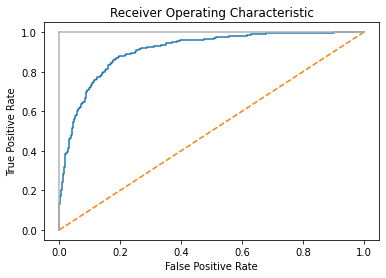

In [10]:
# 분류기를 만듭니다.
logit = LogisticRegression()

# 모델을 훈련합니다.
logit.fit(features_train, target_train)

# 예측 확률을 계산합니다.
target_probabilities = logit.predict_proba(features_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [11]:
# 예측 확률을 계산합니다.
logit.predict_proba(features_test)[0:1]

array([[0.86891533, 0.13108467]])

In [12]:
logit.classes_

array([0, 1])

In [13]:
print("임계값:", threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:", false_positive_rate[116])

임계값: 0.5331715230155316
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725


In [14]:
print("임계값:", threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:", false_positive_rate[45])

임계값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.047058823529411764


In [15]:
# ROC 곡선 아래 면적을 계산합니다.
roc_auc_score(target_test, target_probabilities)

0.9073389355742297

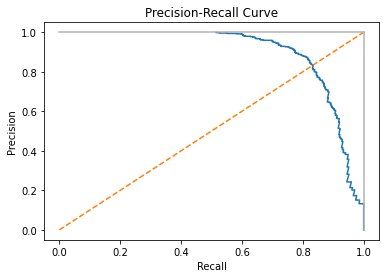

In [16]:
from sklearn.metrics import precision_recall_curve

# 진짜 양성 비율과 거짓 양성 비율을 계산합니다.
precision, recall, threshold = precision_recall_curve(
    target_test, target_probabilities)

# ROC 곡선을 그립니다.
plt.title("Precision-Recall Curve")
plt.plot(precision, recall)
plt.plot([0, 1], ls="--")
plt.plot([1, 1], c=".7"), plt.plot([1, 1], [1, 0] , c=".7")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

In [17]:
from sklearn.metrics import average_precision_score

# 평균 정밀도를 계산합니다.
average_precision_score(target_test, target_probabilities)

0.8984128719848977

In [18]:
cross_validate(logit, features, target, scoring=["roc_auc", "average_precision"])

{'fit_time': array([0.08975244, 0.01856518, 0.01756978, 0.01921105, 0.0211153 ]),
 'score_time': array([0.00290346, 0.00353432, 0.00349474, 0.00346923, 0.00343895]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

## 분류기 성능 시각화하기

In [20]:
# 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


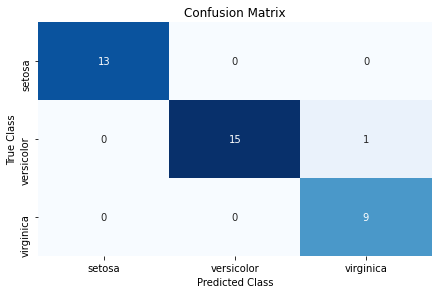

In [21]:
# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression()

# 모델을 훈련하고 예측 결과를 계산합니다.
target_predicted = classifier.fit(features_train,
    target_train).predict(features_test)

# 오차 행렬을 만듭니다.
matrix = confusion_matrix(target_test, target_predicted)

# 판다스 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# 히트맵을 만듭니다.
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## 사용자 정의 평가 지표 만들기

In [22]:
# 라이브러리를 임포트합니다.
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# 특성 행렬과 타깃 벡터를 만듭니다.
features, target = make_regression(n_samples = 100,
                                   n_features = 3,
                                   random_state = 1)

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.10, random_state=1)

# 사용자 정의 지표를 만듭니다.
def custom_metric(target_test, target_predicted):
    # R^2 점수를 계산합니다.
    r2 = r2_score(target_test, target_predicted)
    # R^2 점수를 반환합니다.
    return r2

# 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듭니다.
score = make_scorer(custom_metric, greater_is_better=True)

# 릿지(ridge) 회귀 모델을 만듭니다.
classifier = Ridge()

# 릿지 회귀 모델을 훈련합니다.
model = classifier.fit(features_train, target_train)

# 사용자 정의 스코어 함수를 적용합니다.
score(model, features_test, target_test)

0.9997906102882058

In [23]:
# 예측
target_predicted = model.predict(features_test)

# R^2 점수를 계산합니다.
r2_score(target_test, target_predicted)

0.9997906102882058

## 평가 지표 리포트 만들기

In [24]:
# 라이브러리를 임포트합니다.
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 데이터를 로드합니다.
iris = datasets.load_iris()

# 특성 행렬을 만듭니다.
features = iris.data

# 타깃 벡터를 만듭니다.
target = iris.target

# 타깃 클래스 이름의 리스트를 만듭니다.
class_names = iris.target_names

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(
    features, target, random_state=1)

# 로지스틱 회귀 모델을 만듭니다.
classifier = LogisticRegression()

# 모델을 훈련하고 예측을 만듭니다.
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)

# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [25]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test,
                            target_predicted,
                            labels=[0,1,2,3]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
